In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [32]:
x = [np.log(i) for i in range(1,100)]

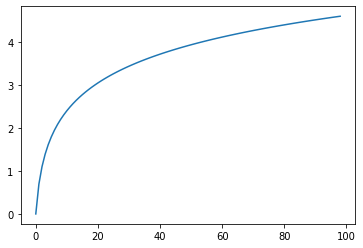

In [33]:
plt.plot(x)

In [31]:
# Heaviside step function. I use eta to be consistent with my professor's notation
def eta(x):
    r = 0
    if x > 0:
        r = 1
    if x == 0:
        r = 0.5
    return r

In [5]:
def theta(t, tau):
    return eta(t / tau) - eta(t / (tau - 1))

In [6]:
# My signal
@np.vectorize
def s(t, tau, n, A):
    return ((-1)**n) * A * (1 - abs(2 * t / (tau - 1))) * np.sin((2 * np.pi * n * t) / tau) * theta(t, tau)

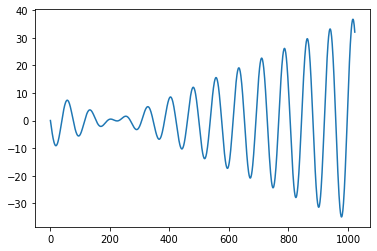

In [7]:
x = np.linspace(0, 2, 1024)
y = s(x, 0.15, 1, 10) 
plt.plot(y)

In [10]:
def plot(t, tau, n, A):
    x = np.linspace(0, t, 1024)
    y = s(x, tau, n, A)
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("s(t)")

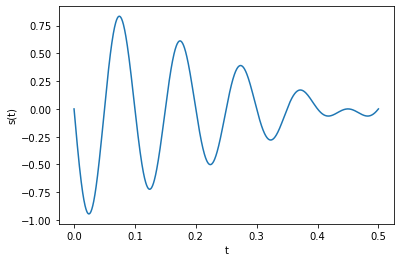

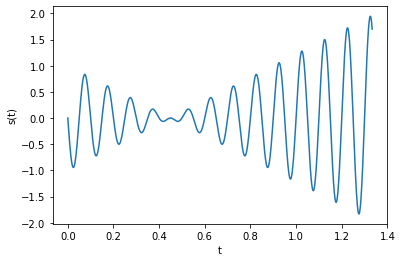

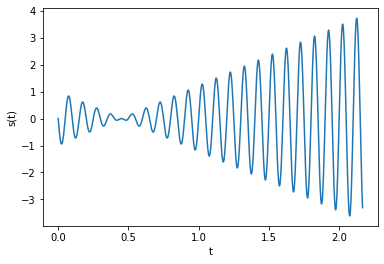

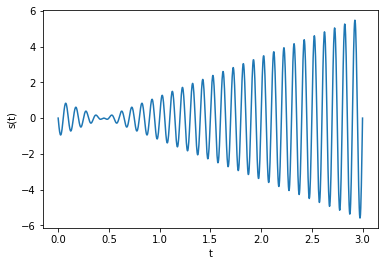

In [39]:
for i in np.linspace(0.5, 3, 4):
    plot(i, 0.1, 1, 1) 

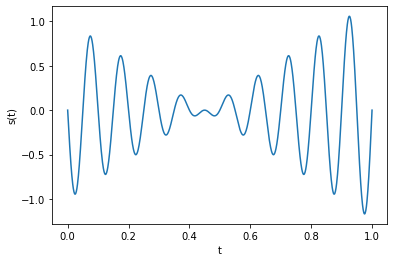

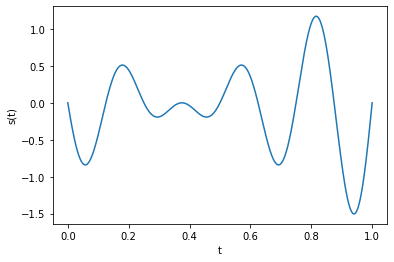

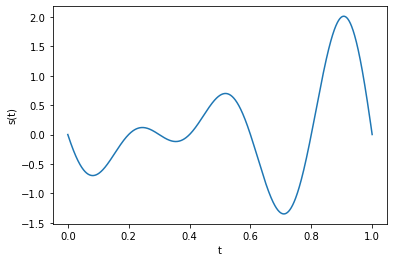

In [38]:
for tau in np.linspace(0.1, 0.4, 3):
    plot(1, tau, 1, 1)

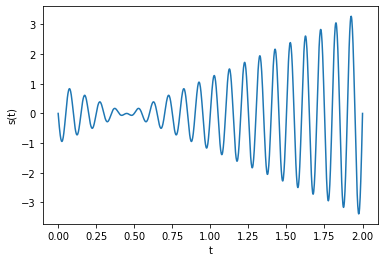

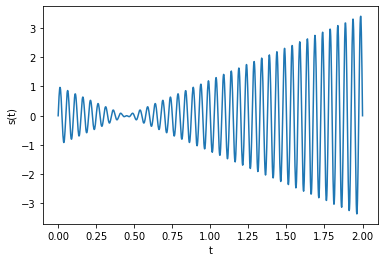

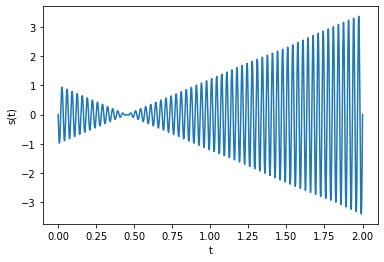

In [37]:
#for diffrent n
for n in range(1, 4):
    plot(2, 0.1, n, 1) 

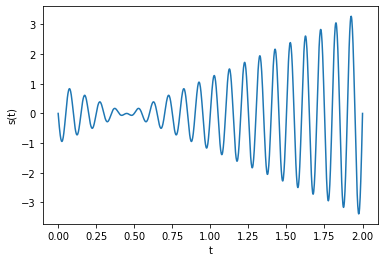

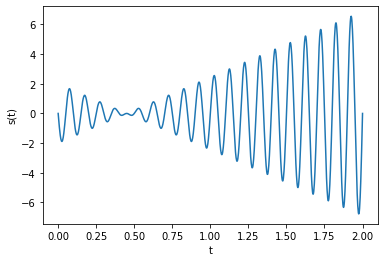

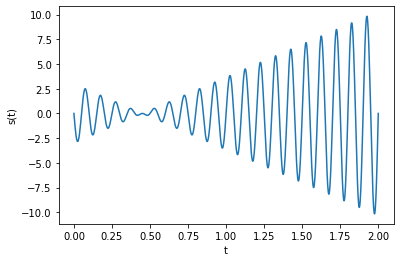

In [36]:
for a in range(1, 4):
    plot(2, 0.1, 1, a) 

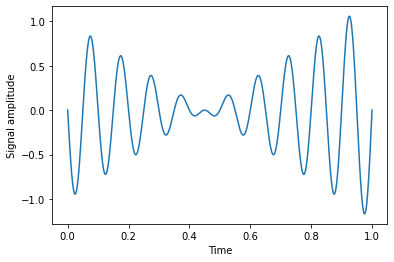

In [41]:

x = np.linspace(0, 1, 1024)
y = s(x, 0.1, 1, 1)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('Time')
ax.set_ylabel('Signal amplitude');

(0.0, 0.05)

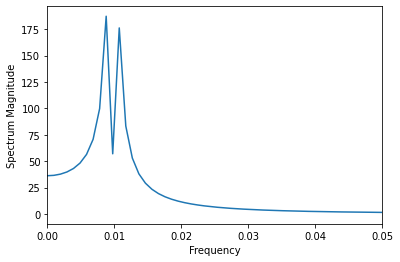

In [48]:
from scipy import fftpack
from scipy.fft import rfft, rfftfreq

Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Spectrum Magnitude')
ax.set_xlim(0, 0.05)